# Excersise 3 . B


Question: PCA can be even more useful with larger datasets. Explain why

A : When dealing with large datasets, especielly datasets that contains images just like the Olivetti faces that we have in this assignment. being able to compress the data into a smaller dimension is very useful. This is because it will take less time to train the model and it will also take less time to predict the outcome of the model. 

Also if an image has many and very distinct features it will be hard to train a model on it. By using PCA we can reduce the number of features and still get a good result.
it does so by by finding, seperating out and sorting the features that explain the most variance in the data, in descending order.

Also there is the deal with storage capacity, when a model needs to train on a huge dataset it could be very expensive to store the data. By using PCA we can reduce the size of the dataset and therefore reduce the cost of storing the data.

In [1410]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [1411]:
# Load dataset

In [1412]:
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

In [1413]:
# Showcase the dataset loaded

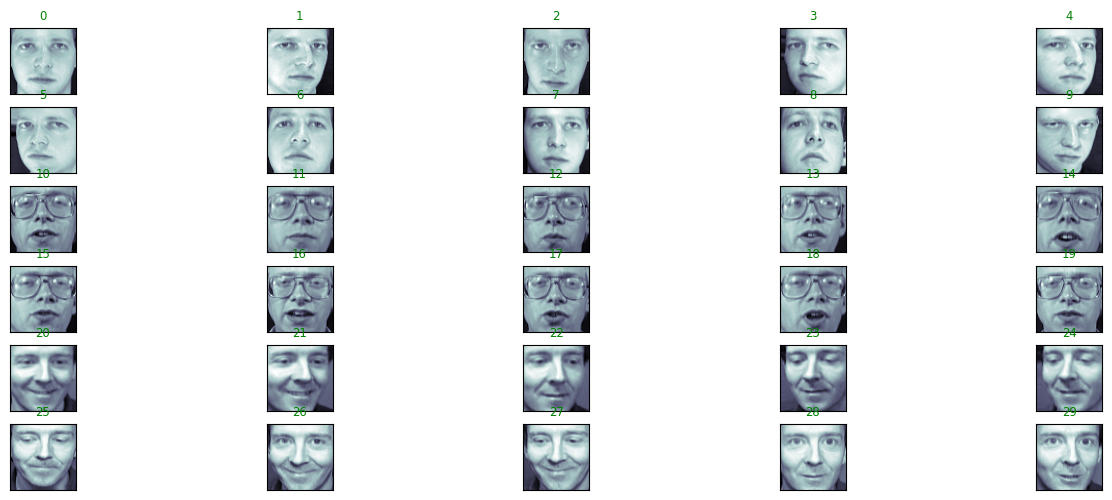

In [1414]:
# Since the faces are already scaled to the same size we can skip that step,
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
    ax.set_title(i, fontsize='small', color='green')
plt.show()

In [1415]:
# Split the dataset into training and testing sets

In [1416]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

In [1417]:
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [1418]:
# Perform PCA on the dataset by  using the sklearn decomposition module which includes matrix decomposition algorithms including PCA
#n_components determines how many principal components you want to keep from the original dataset.

In [1419]:
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)


PCA(n_components=150, whiten=True)

In [1420]:
# Show the eigenfaces gives us these somewhat creepy images

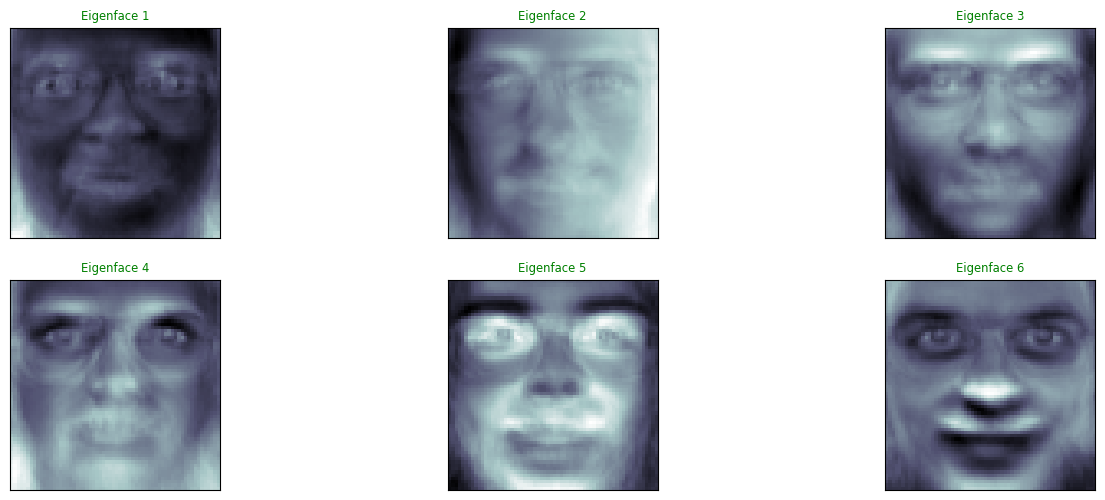

In [1421]:
fig = plt.figure(figsize=(16, 6))
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    ax.set_title("Eigenface {}".format(i + 1), fontsize='small', color='green')

In [1422]:
# Transform the dataset using the PCA

In [1423]:
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

In [1424]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(300, 150)
(100, 150)


In [1425]:
# Train a SVM classifier on the dataset

In [1426]:
#clf = svm.SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
clf = svm.SVC()
clf.fit(x_train_pca, y_train)

SVC()

In [1427]:
# Predict the labels of the test set

In [1428]:
y_pred = clf.predict(x_test_pca)

In [1429]:
# Show the results of the prediction

In [1430]:
report = classification_report(y_test, y_pred, zero_division=0)

In [1431]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.50      0.67         4
           2       1.00      0.50      0.67         2
           3       0.25      1.00      0.40         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      0.50      0.67         4
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      0.67      0.80         3
          16       0.00      0.00      0.00         0
          17       1.00    

Given the classification report we see that the model does really well classifying the images.
Some of the images does have a low f1-score of 0.5, but the overall f1-score is 0.83 which is really good.

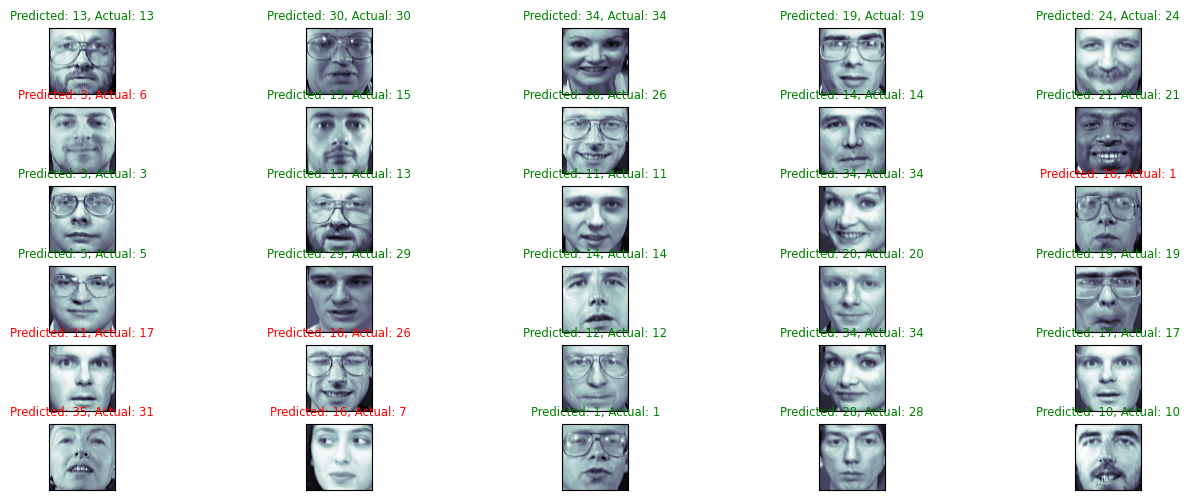

In [1432]:
fig = plt.figure(figsize=(16, 6))
# Show the first 20 images of the test set
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    color = ('green' if y_pred[i] == y_test[i] else 'red')
    ax.set_title("Predicted: {}, Actual: {}".format(y_pred[i], y_test[i]), fontsize='small', color=color)

In [1433]:
plt.show()

In [1434]:
# Now let's try changing some of the values in the SVM classifier
newClf = svm.SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001,probability=True)
newClf.fit(x_train_pca, y_train)

SVC(C=5, class_weight='balanced', gamma=0.001, probability=True)

In [1435]:
prediction = newClf.predict(x_test_pca)

In [1436]:
newReport = classification_report(y_test, prediction)

In [1437]:
print(newReport)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

The configurations changed is:
clf = svm.SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
Changed the C value to 5 and the gamma value to 0.001
This provides us with a better f1-score of 0.95 avg.

In [1438]:
# Now lets plot the faces again with the new prediction

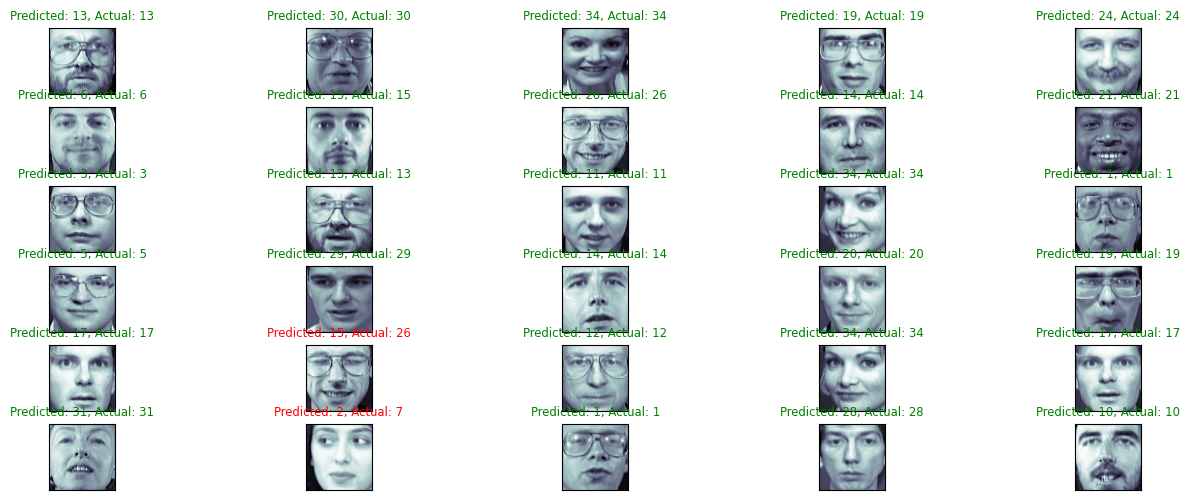

In [1439]:
fig = plt.figure(figsize=(16, 6))
# Show the first 20 images of the test set
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    color = ('green' if prediction[i] == y_test[i] else 'red')
    ax.set_title("Predicted: {}, Actual: {}".format(prediction[i], y_test[i]), fontsize='small', color=color)

In [1440]:
plt.show()

Changing the values in the SVM classifier has improved the overall prediction of the model. As it has now classified all images correctly.
Q: is it nessecary to apply PCA to this dataset?


In [1441]:
svmNoPCA = svm.SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svmNoPCA.fit(X_train, y_train)

SVC(C=5, class_weight='balanced', gamma=0.001)

In [1442]:
predictionNoPCA = svmNoPCA.predict(X_test)

In [1443]:
# How does the model perform without PCA?

In [1444]:
reportWithNoPCA = classification_report(y_test, predictionNoPCA, zero_division=0)

In [1445]:
print(reportWithNoPCA)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00    

Lets also plot the images like before to see how well the model performs without PCA

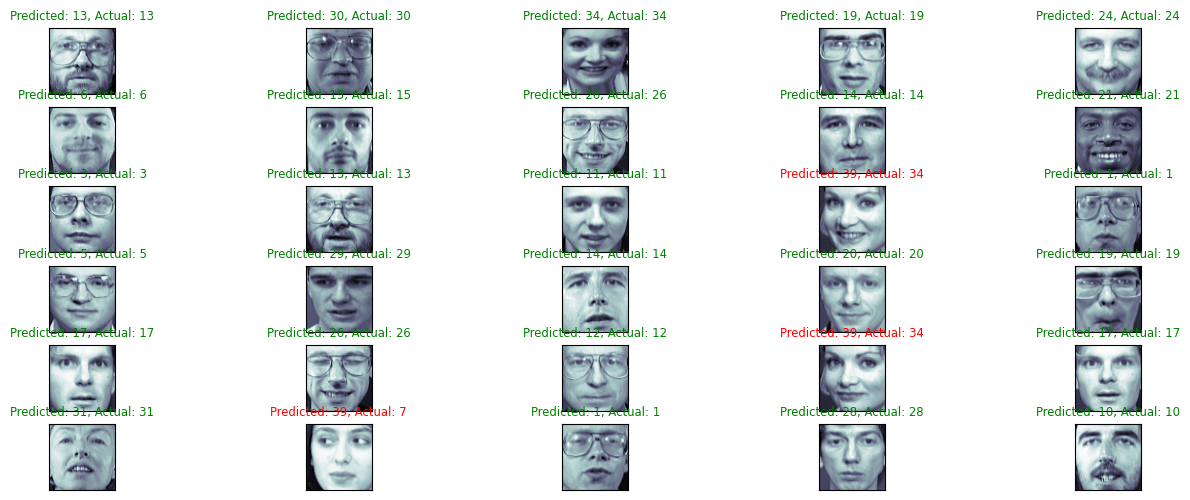

In [1446]:
fig = plt.figure(figsize=(16, 6))
# Show the first 20 images of the test set
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    color = ('green' if predictionNoPCA[i] == y_test[i] else 'red')
    ax.set_title("Predicted: {}, Actual: {}".format(predictionNoPCA[i], y_test[i]), fontsize='small', color=color)

In [1447]:
plt.show()

# Answer.
- As we can see the model performs a little bit worse when not having applied PCA to the dataset.

# Scenario
Lets say you are only looking for one person in the dataset, how could you change the dataset in
order to be able to tell whether a new picture is this person or not? How could you code this (Again:
Explain in words, or with code).
A: Given that we already have a model to test this with I would use the model to predict the outcome of the new image.
by using the predict method on the model we can get the predicted outcome of the image.

In [1448]:
# Lets try to predict the outcome of a new image

In [1449]:
new_image = faces.images[0]

In [1450]:
#Preprocess the image with PCA 

In [1451]:
new_image_pca = pca.transform(new_image.reshape(1, -1))

In [1452]:
predicted_label = newClf.predict(new_image_pca)
predicted_probability = newClf.predict_proba(new_image_pca)

In [1453]:
predicted_person = faces.target[predicted_label[0]]

In [1454]:
# Print the result
print(f"Predicted Person: {predicted_person}")
print(f"Predicted Probability: {np.max(predicted_probability):.2f}")

Predicted Person: 0
Predicted Probability: 0.49


It does seem like the prediction isn't quite working as intended.